<a href="https://colab.research.google.com/github/Khushi-Shah-1/Crime-Analysis-in-India/blob/main/Crime_analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import osgeo
import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly.express as px
#import plotly.graph_objects as go
#import plotly.figure_factory as ff
#from plotly.colors import n_colors
from matplotlib import cm
#from plotly.subplots import make_subplots
import matplotlib
import cufflinks as cf
cf.go_offline()

In [5]:
!pip install fiona

     |████████████████████████████████| 15.4 MB 37 kB/s 


In [6]:
import fiona

In [7]:
!pip install geopandas

     |████████████████████████████████| 994 kB 7.4 MB/s 
     |████████████████████████████████| 6.6 MB 55.6 MB/s 


In [16]:
import geopandas as gpd

In [10]:
from google.colab import files
uploaded = files.upload()

Saving Corruption 2019.csv to Corruption 2019 (1).csv
Saving crime against scheduled cast 2019.csv to crime against scheduled cast 2019.csv
Saving Cyber crime2019.csv to Cyber crime2019.csv
Saving Rape 2019.csv to Rape 2019.csv


In [11]:
corruption=pd.read_csv("Corruption 2019.csv")
sccrime=pd.read_csv("crime against scheduled cast 2019.csv")
cyber=pd.read_csv("Cyber crime2019.csv")
rape=pd.read_csv("Rape 2019.csv")

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Indian_states.dbf to Indian_states.dbf
Saving Indian_states.prj to Indian_states.prj
Saving Indian_states.shp to Indian_states.shp
Saving Indian_states.shx to Indian_states.shx


# Corruption

In [25]:
corruption.head()

,Category,State/UT,Cases Pending Investigation from Previous Year,Cases Reported during the year,Cases ReOpened for Investigation,Cases Transferred to other State or Agency,Cases With-drawn by the Govt,Cases in Which Final Reports Submitted,Cases Charge-sheeted,Cases Pending Investigation at End of the Year,Total cases,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,State,Andhra Pradesh,360,123,0,0,0,2,78,403,483,NaN,NaN,NaN,NaN
1,State,Arunachal Pradesh,63,13,0,0,0,0,2,74,76,NaN,NaN,NaN,NaN
2,State,Assam,96,18,0,0,0,5,7,102,114,NaN,NaN,NaN,NaN
3,State,Bihar,288,71,2,0,0,16,42,303,359,NaN,NaN,NaN,NaN
4,State,Chhattisgarh,69,19,0,0,0,6,15,67,88,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Pending and new cases')

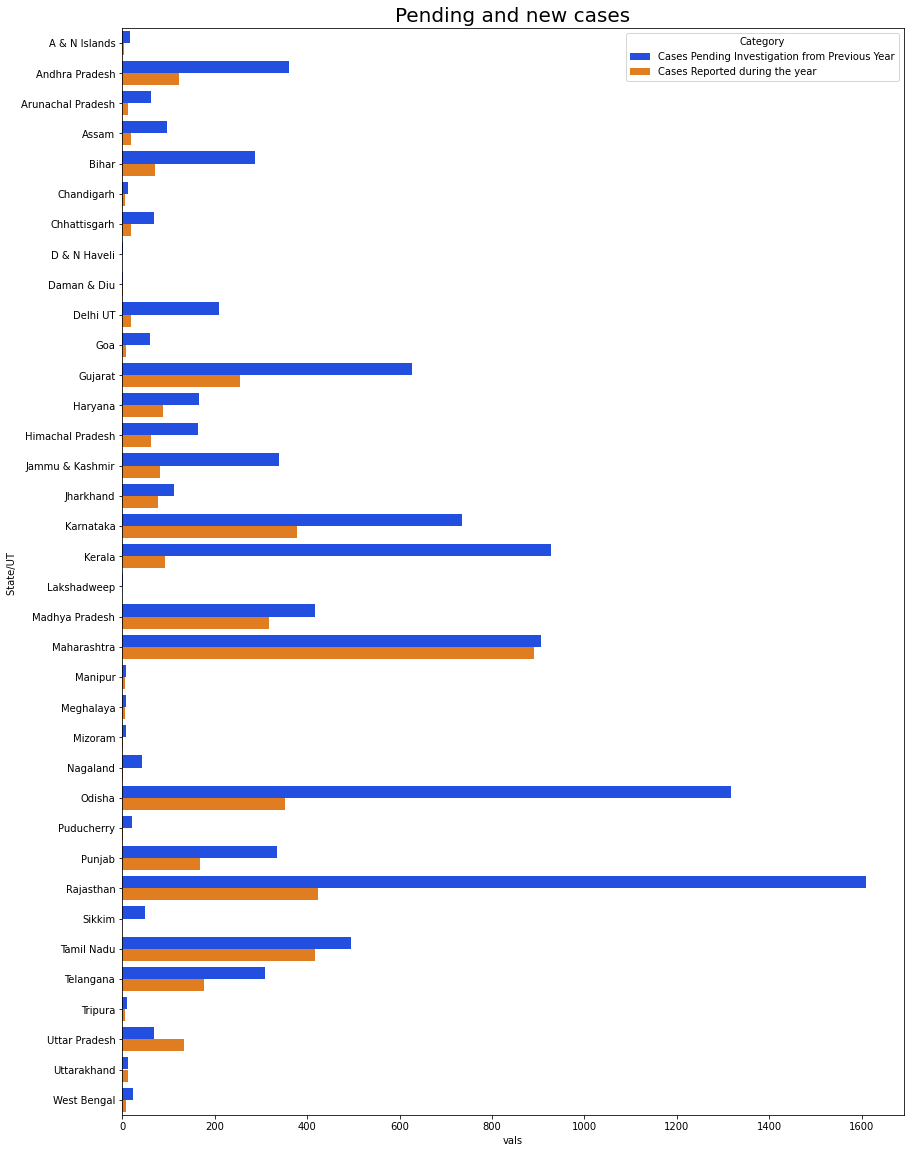

In [13]:
corruption1 = corruption.groupby(['State/UT '])['Cases Pending Investigation from Previous Year','Cases Reported during the year'].sum().reset_index() 
corruption1 = corruption1.melt('State/UT ', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'State/UT ' , x = 'vals',hue = 'Category' ,data = corruption1,palette= 'bright')
plt.title("Pending and new cases",size=20)

Text(0.5, 1.0, 'Status of cases')

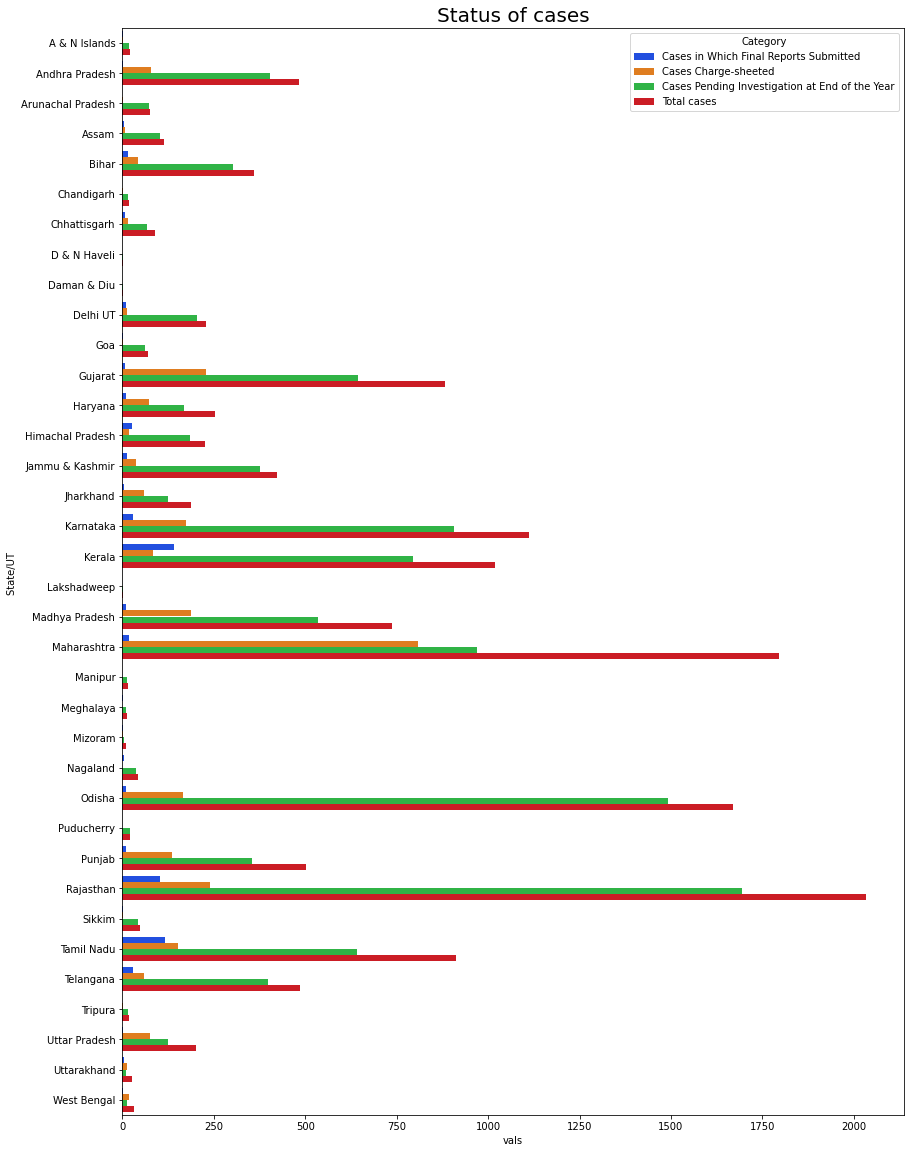

In [14]:
corruption2 = corruption.groupby(['State/UT '])['Cases in Which Final Reports Submitted','Cases Charge-sheeted','Cases Pending Investigation at End of the Year','Total cases'].sum().reset_index() 
corruption2 = corruption2.melt('State/UT ', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'State/UT ' , x = 'vals',hue = 'Category' ,data = corruption2,palette= 'bright')
plt.title("Status of cases",size=20)

In [17]:
corrupt1 = corruption  #we need only total number of victims per state
corrupt1 = corrupt1.groupby(['State/UT '])['Total cases'].sum().sort_values(ascending = False).reset_index()
corrupt1.sort_values('State/UT ')
gdf = gpd.read_file('Indian_states.shp')
corrupt1.at[17, 'State/UT '] = 'Delhi'
merged = gdf.merge(corrupt1, left_on='st_nm', right_on='State/UT ')
merged.drop(['State/UT '], axis=1)

,st_nm,geometry,Total cases
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",114
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",359
2,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",18
3,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",88
4,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",2
5,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",69
6,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",882
7,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",254
8,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",225
9,Jammu & Kashmir,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",422


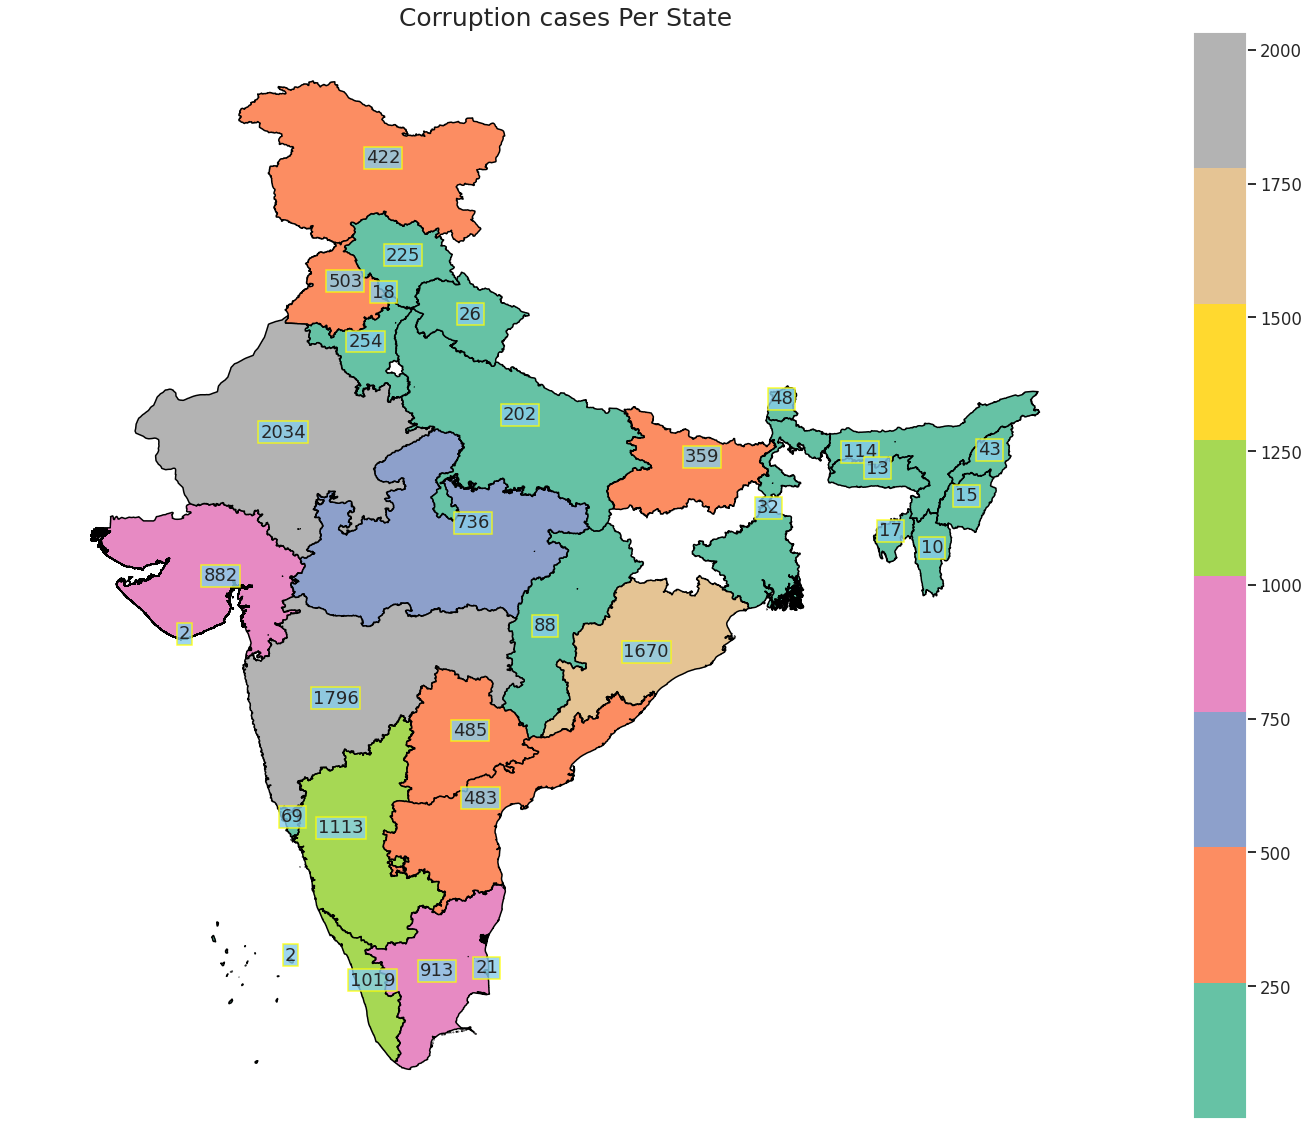

In [20]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]

sns.set_context("talk")
sns.set_style("dark")
cmap = 'Set2'
figsize = (25, 20)

ax = merged.dropna().plot(column= 'Total cases', cmap=cmap, figsize=figsize,edgecolor='black')


for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Total cases'], horizontalalignment='center', bbox={'facecolor': 'skyblue', 'alpha':0.8, 'pad': 2, 'edgecolor':'yellow'})

ax.set_title("Corruption cases Per State", size = 25)

norm = matplotlib.colors.Normalize(vmin=merged['Total cases'].min(), vmax= merged['Total cases'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

# Analysis
## 1. The highest corruption related cases are reported in Rajasthan followed by Odisha, kerala and maharashtra.
## 2. In every region, cases with pending investigation at the end of the year are significantly higher than cases that are charge-sheeted plus cases where final report submitted combined. 

# Crimes against scheduled cast

In [26]:
sccrime.head()

,Category (Col. 1),State/UT,SC/ST (Prevention of Atrocities) Act r/w IPC (Total),SC/ST (Prevention of Atrocities) Act r/w IPC (Total) .1,SC/ST (Prevention of Atrocities) Act r/w IPC (Total) .2,SC/ST (Prevention of Atrocities) Act - Murder (Sec. 302 IPC) - V (Col. 7),SC/ST (Prevention of Atrocities) Act - Murder (Sec. 302 IPC) - R (Col. 8),SC/ST (Prevention of Atrocities) Act - Attempt to Commit Murder (Sec. 307 IPC),SC/ST (Prevention of Atrocities) Act - Attempt to Commit Murder (Sec. 307 IPC) .1,SC/ST (Prevention of Atrocities) Act - Attempt to Commit Murder (Sec. 307 IPC) .2,"SC/ST (Prevention of Atrocities) Act r/w IPC - Simple Hurt (Secs. 323 r/w IPC 324, 327, 328, 330, 332, 353 IPC)","SC/ST (Prevention of Atrocities) Act r/w IPC - Simple Hurt (Secs. 323 r/w IPC 324, 327, 328, 330, 332, 353 IPC)","SC/ST (Prevention of Atrocities) Act r/w IPC - Simple Hurt (Secs. 323 r/w IPC 324, 327, 328, 330, 332, 353 IPC) .1",SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - Grievous Hurt (Sec. 325 & 326 IPC) (Total),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - Grievous Hurt (Sec. 325 & 326 IPC) (Total),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - Grievous Hurt (Sec. 325 & 326 IPC) (Total) - R (Col. 17),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - A) Grievous Hurt - I (Col. 18),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - A) Grievous Hurt - V (Col. 19),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - A) Grievous Hurt - R (Col. 20),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - B) Acid Attack (Sec. 326A IPC) - I (Col. 21),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - B) Acid Attack (Sec. 326A IPC) - V (Col. 22),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - B) Acid Attack (Sec. 326A IPC) - R (Col. 23),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - C) Attempt to Acid Attack (Sec. 326B IPC) - I (Col. 24),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - C) Attempt to Acid Attack (Sec. 326B IPC) - V (Col. 25),SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - C) Attempt to Acid Attack (Sec. 326B IPC) - R (Col. 26),"SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - D) Other Grievous Hurt (Secs. 329, 331, 333, 335 IPC) - I (Col. 27)","SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - D) Other Grievous Hurt (Secs. 329, 331, 333, 335 IPC) - V (Col. 28)","SC/ST (Prevention of Atrocities) Act r/w IPC - Grievous Hurt - D) Other Grievous Hurt (Secs. 329, 331, 333, 335 IPC) - R (Col. 29)",SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - Assault on Women with Intent to Outrage her Modesty (Adults+Children) - I (Col. 30),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - Assault on Women with Intent to Outrage her Modesty (Adults+Children) - V (Col. 31),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - Assault on Women with Intent to Outrage her Modesty (Adults+Children) - R (Col. 32),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - A) Assault on Women (Above 18 years) - I (Col. 33),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - A) Assault on Women (Above 18 years) - V (Col. 34),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - A) Assault on Women (Above 18 years) - R (Col. 35),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - a1) Assault on Adult Women with Intent to Outrage her Modesty (Sec. 354 IPC) - I (Col. 36),SC/ST (Prevention of Atrocities) Act r/w IPC - Assault on Women with Intent to Outrage her Modesty - a1) Assault on Adult Women with Intent to Outrage her Modesty (Sec. 354 I

In [22]:
crime1 = sccrime  #we need only total number of victims per state
crime1 = crime1.groupby(['State/UT '])['Total Crime/Atrocities against Scheduled Castes - V (Col. 148)'].sum().sort_values(ascending = False).reset_index()
crime1.sort_values('State/UT ')
gdf = gpd.read_file('Indian_states.shp',SHAPE_RESTORE_SHX='YES')
crime1.at[17, 'State/UT '] = 'Delhi'
merged = gdf.merge(crime1, left_on='st_nm', right_on='State/UT ')
merged.drop(['State/UT '], axis=1)

,st_nm,geometry,Total Crime/Atrocities against Scheduled Castes - V (Col. 148)
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",21
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",6739
2,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",1
3,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",348
4,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",1
5,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",3
6,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",1496
7,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",1099
8,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",189
9,Jammu & Kashmir,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",2


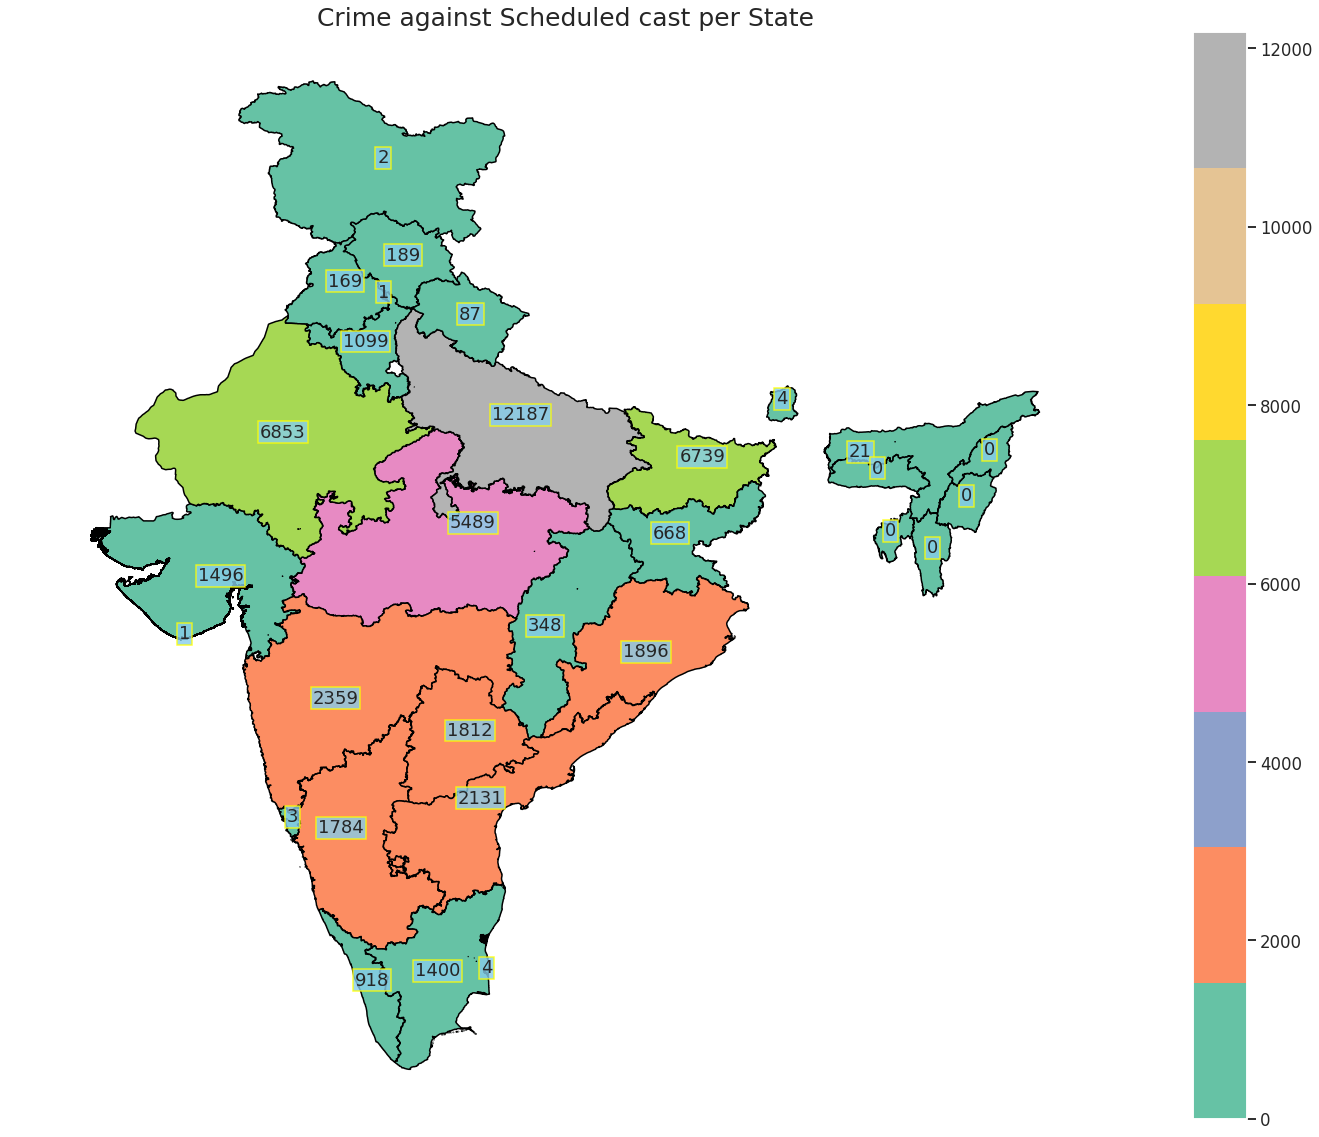

In [23]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('dark_background')
cmap = 'Set2'
figsize = (25, 20)

ax = merged.dropna().plot(column= 'Total Crime/Atrocities against Scheduled Castes - V (Col. 148)', cmap=cmap, figsize=figsize,edgecolor='black')


for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Total Crime/Atrocities against Scheduled Castes - V (Col. 148)'], horizontalalignment='center', bbox={'facecolor': 'skyblue', 'alpha':0.8, 'pad': 2, 'edgecolor':'yellow'})

ax.set_title("Crime against Scheduled cast per State", size = 25)

norm = matplotlib.colors.Normalize(vmin=merged['Total Crime/Atrocities against Scheduled Castes - V (Col. 148)'].min(), vmax= merged['Total Crime/Atrocities against Scheduled Castes - V (Col. 148)'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

# Analysis
## The highest reported cases were seen in U.P followed by Rajasthan and Bihar.
## Very few cases were reported in norteast region

# **Rape Cases 2019**

In [24]:
rape.head()

,Category,State/UT,Punishment for Rape,Rape in Custody- Rape in Custody (Total),Rape in Custody - By Police Personnel,Rape in Custody - By Public Servant,Rape in Custody - By Member of Armed Forces,Rape in Custody - By Management/Staff of Jail/Remand Home/Place of Custody,Rape in Custody - By Management/ Staff of Hospital,Rape Other than Custodial (Total),Other Than Custodial Rape- By Relative/Guardian/Teacher/person in position of trust,Other Than Custodial Rape- On Pregnant Women,Other Than Custodial Rape - On Women Below 16 years of age,Other Than Custodial Rape - On Women Incapable of giving Consent,Other Than Custodial Rape - By Persons in Control or Dominance over women,Other Than Custodial Rape - On Women with Mental or Physical disability,Other Than Custodial Rape- Endanger life of Women after Rape,Other Than Custodial Rape - Repeated Rape on same women,Punishment upto 20 years extended to life for Rape (Below 16 Yrs),Punishment for causing Death,By Separated husband,Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death),By Person in Authority,Gang Rape,Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death),Punishment for Repeat offenders,Rape (Total)
0,State,Andhra Pradesh,758,1,0,0,1,0,0,283,17,0,101,12,2,8,0,98,15,0,0,10,1,9,2,0,1086
1,State,Arunachal Pradesh,46,0,0,0,0,0,0,12,4,0,4,0,0,2,0,2,0,0,1,0,0,4,0,0,63
2,State,Assam,1599,11,0,0,0,11,0,104,31,0,1,21,36,1,0,0,0,1,1,1,30,25,0,0,1773
3,State,Bihar,700,0,0,0,0,0,0,16,16,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,730
4,State,Chhattisgarh,546,1,1,0,0,0,0,469,267,2,77,35,1,4,3,31,0,0,0,3,0,15,0,0,1036


Text(0.5, 1.0, 'Rape cases Region wise')

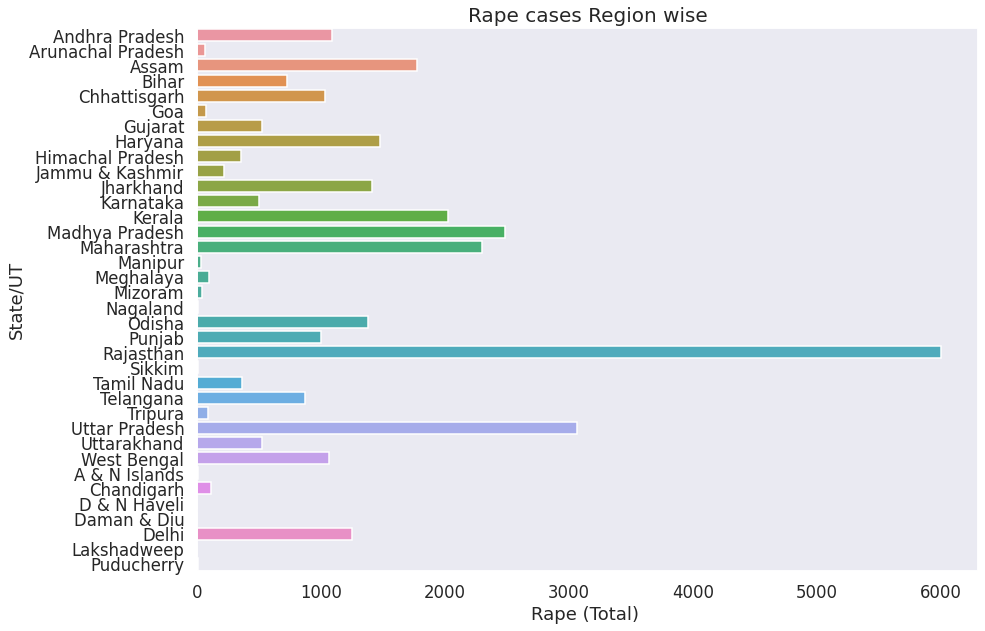

In [27]:
plt.figure(figsize = (14,10))
sns.barplot(data= rape, x= 'Rape (Total) ',y='State/UT')
plt.title('Rape cases Region wise',size = 20)

Text(0.5, 1.0, 'Difference between rape cases and punishment given')

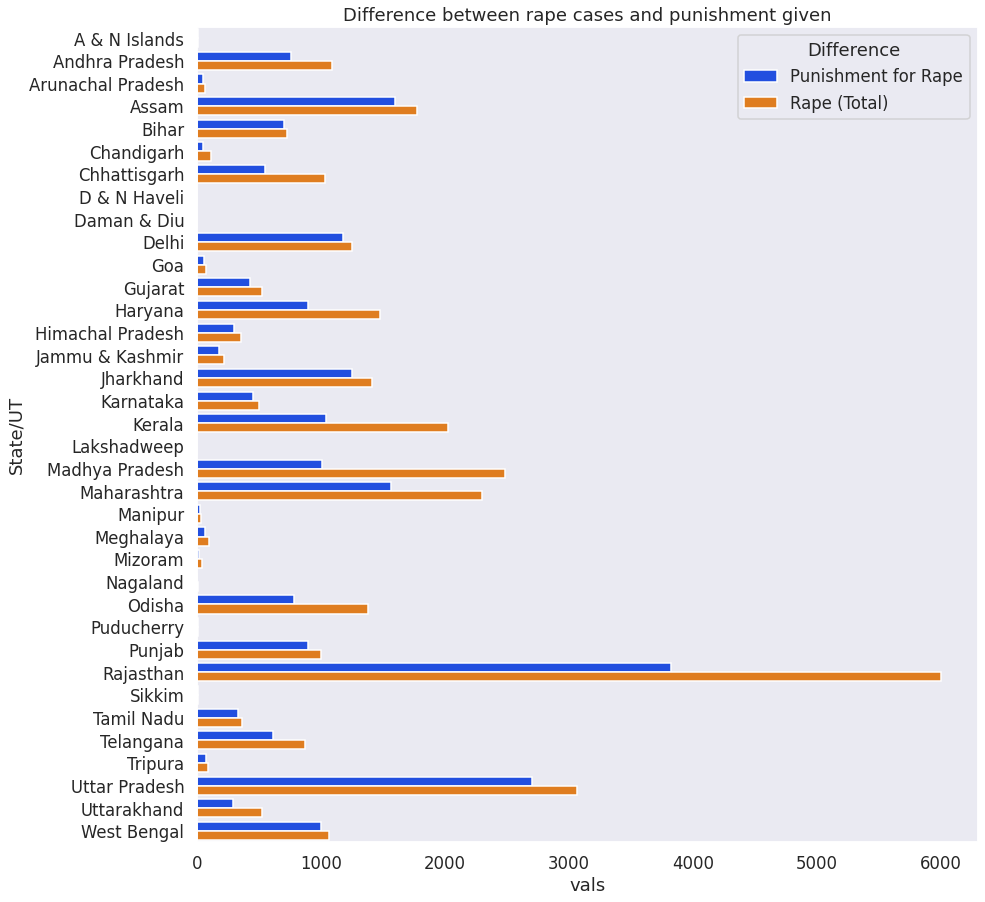

In [28]:
rapediff = rape.groupby(['State/UT'])['Punishment for Rape','Rape (Total) '].sum().reset_index() 
rapediff = rapediff.melt('State/UT', var_name='Difference',  value_name='vals')
plt.figure(figsize = (14,15))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Difference' ,data = rapediff ,palette= 'bright')
plt.title("Difference between rape cases and punishment given")

Text(0.5, 1.0, 'Region wise Custodial Rape')

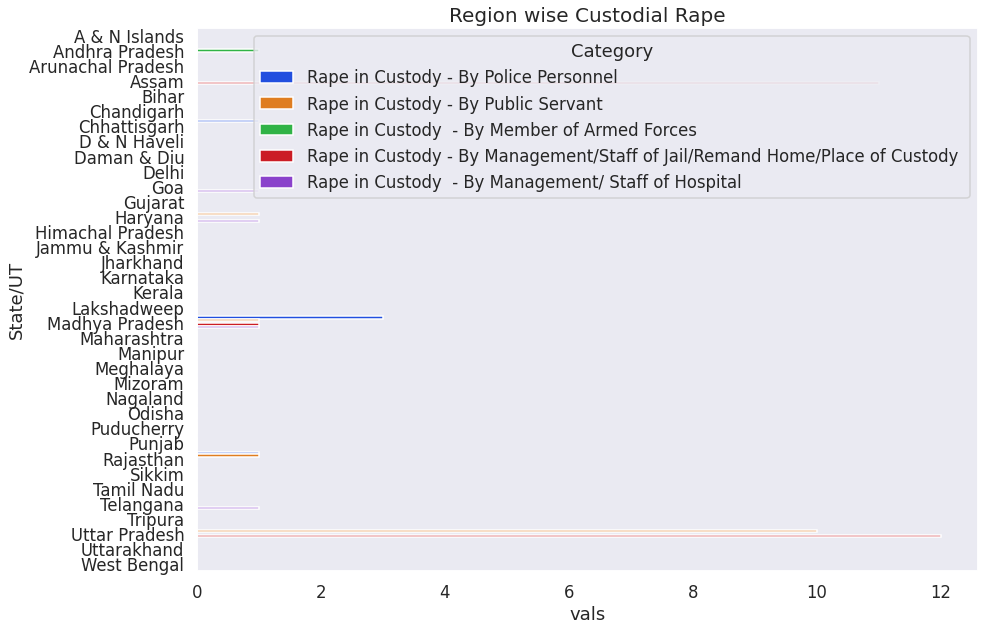

In [29]:
rapecustody = rape.groupby(['State/UT'])['Rape in Custody - By Police Personnel','Rape in Custody - By Public Servant ','Rape in Custody  - By Member of Armed Forces ','Rape in Custody - By Management/Staff of Jail/Remand Home/Place of Custody ','Rape in Custody  - By Management/ Staff of Hospital'].sum().reset_index() 
rapecustody = rapecustody.melt('State/UT', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,10))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Category' ,data = rapecustody ,palette= 'bright')
plt.title("Region wise Custodial Rape",size=20)

Text(0.5, 1.0, 'Region wise Non-Custodial Rape')

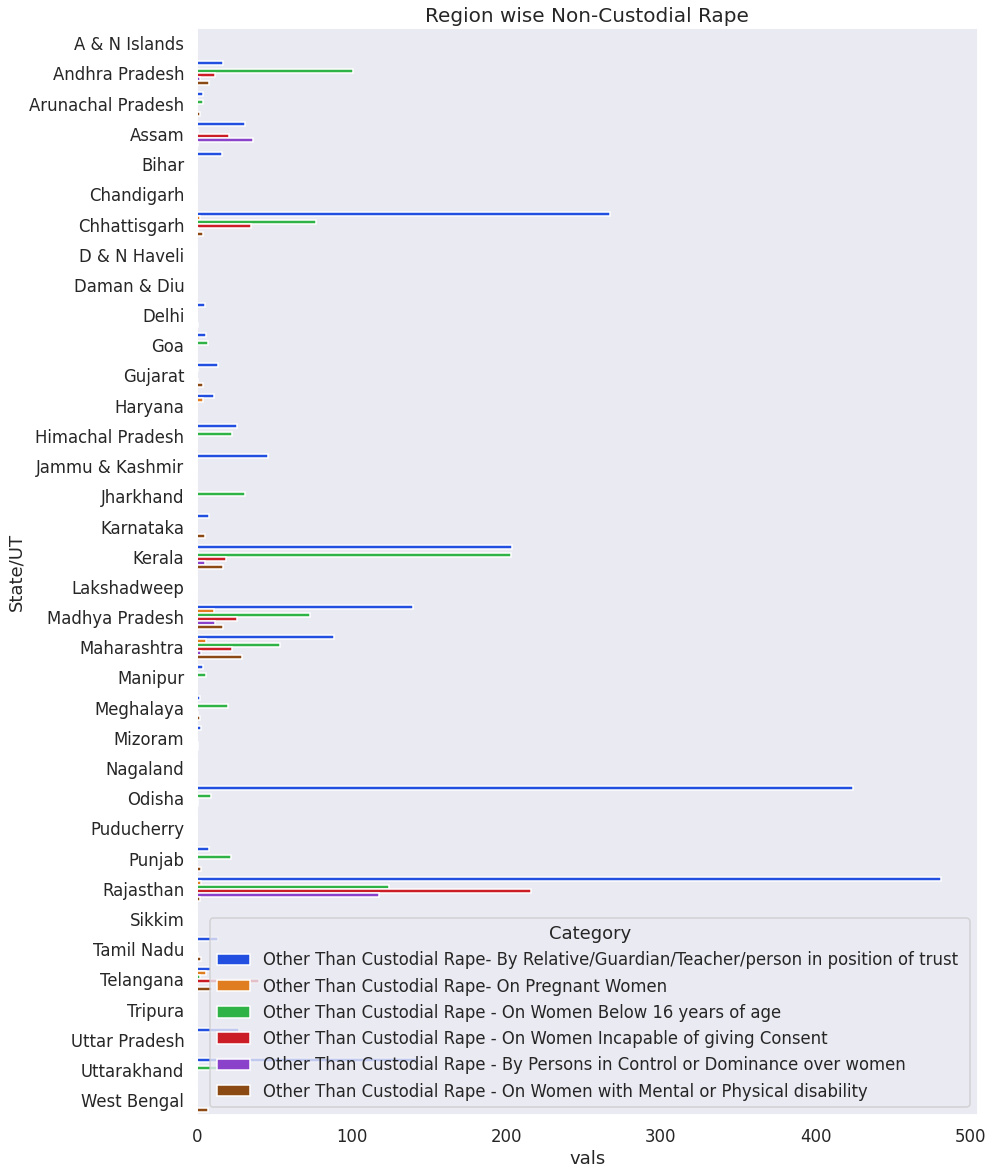

In [30]:
rape1 = rape.groupby(['State/UT'])['Other Than Custodial Rape- By Relative/Guardian/Teacher/person in position of trust ','Other Than Custodial Rape- On Pregnant Women ','Other Than Custodial Rape - On Women Below 16 years of age ','Other Than Custodial Rape - On Women Incapable of giving Consent ','Other Than Custodial Rape - By Persons in Control or Dominance over women','Other Than Custodial Rape - On Women with Mental or Physical disability'].sum().reset_index() 
rape1 = rape1.melt('State/UT', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Category' ,data = rape1 ,palette= 'bright')
plt.title("Region wise Non-Custodial Rape",size=20)

Text(0.5, 1.0, 'Region wise GangRape')

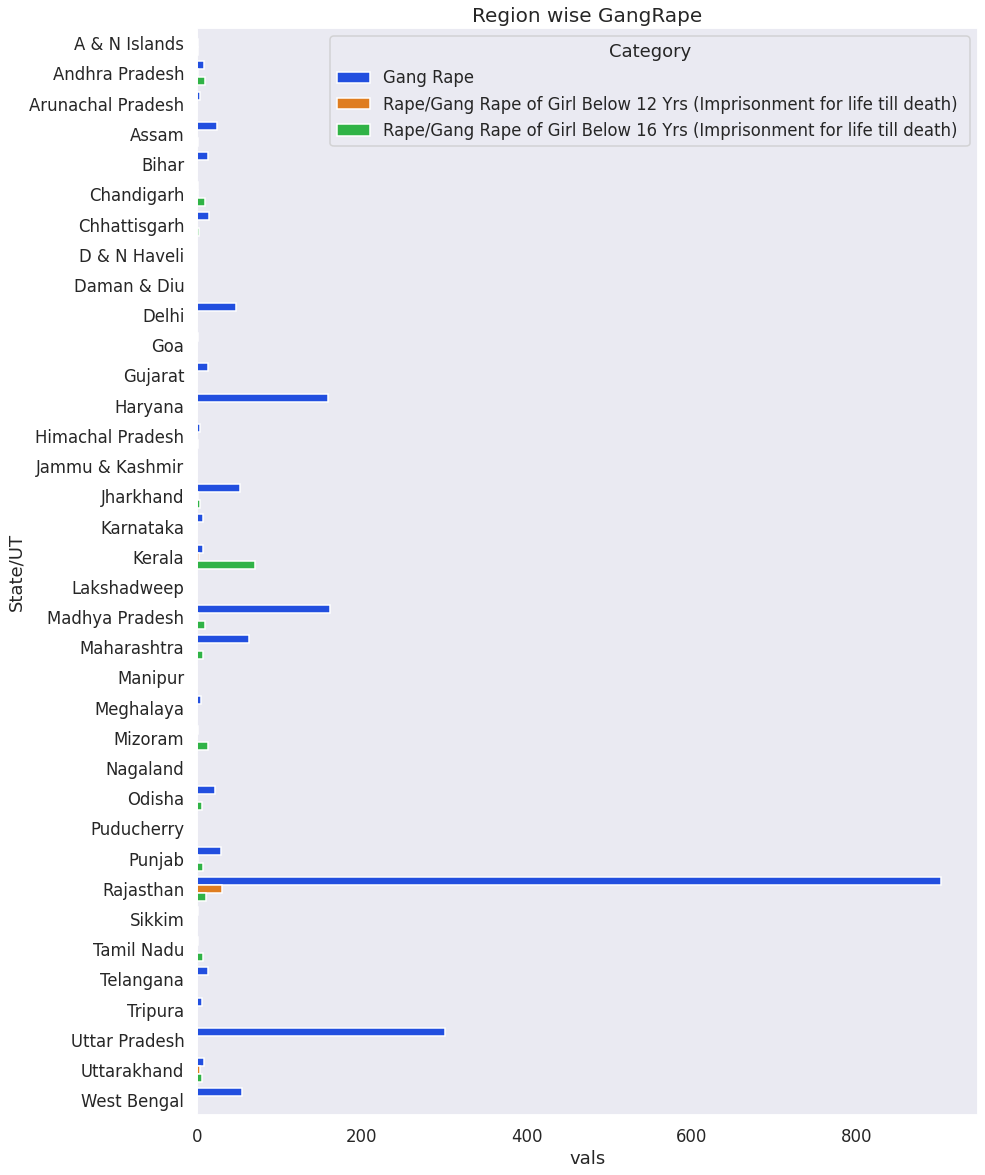

In [31]:
rape2 = rape.groupby(['State/UT'])['Gang Rape','Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) ','Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) '].sum().reset_index() 
rape2 = rape2.melt('State/UT', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Category' ,data = rape2 ,palette= 'bright')
plt.title("Region wise GangRape",size=20)

In [32]:
Rape1 = rape  #we need only total number of victims per state
Rape1 = Rape1.groupby(['State/UT'])['Rape (Total) '].sum().sort_values(ascending = False).reset_index()
Rape1.sort_values('State/UT')
import geopandas as gpd
#gdf=shapefile('india_airport_point.shp')
gdf = gpd.read_file('Indian_states.shp',SHAPE_RESTORE_SHX='YES')
Rape1.at[17, 'State/UT'] = 'Delhi'
merged = gdf.merge(Rape1, left_on='st_nm', right_on='State/UT')
merged.drop(['State/UT'], axis=1)

,st_nm,geometry,Rape (Total)
0,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",1773
1,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",730
2,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",112
3,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",1036
4,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",4
5,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",72
6,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20...",528
7,Haryana,"POLYGON ((76.85065 30.87512, 76.86594 30.86691...",1480
8,Himachal Pradesh,"POLYGON ((76.79634 33.25490, 76.80351 33.25275...",359
9,Jammu & Kashmir,"POLYGON ((74.73451 37.02068, 74.73647 37.01937...",223


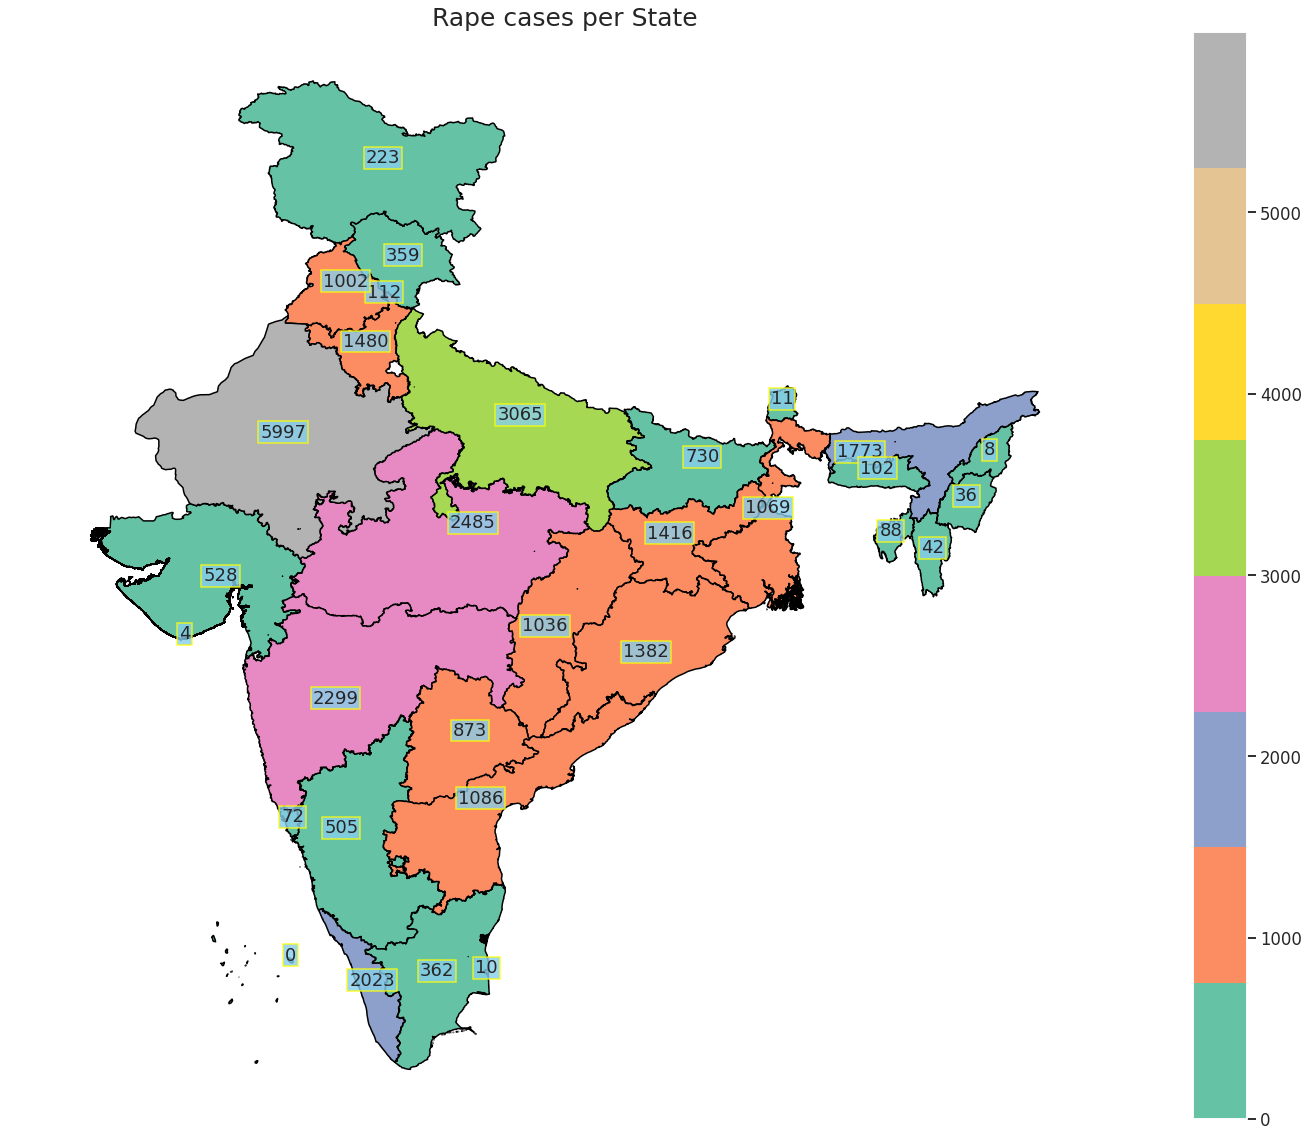

In [34]:
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]


sns.set_context("talk")
sns.set_style("dark")
#plt.style.use('dark_background')
cmap = 'Set2'
figsize = (25, 20)

ax = merged.dropna().plot(column= 'Rape (Total) ', cmap=cmap, figsize=figsize,edgecolor='black')


for idx, row in merged.iterrows():
   ax.text(row.coords[0], row.coords[1], s=row['Rape (Total) '], horizontalalignment='center', bbox={'facecolor': 'skyblue', 'alpha':0.8, 'pad': 2, 'edgecolor':'yellow'})


ax.set_title("Rape cases per State", size = 25)

norm = matplotlib.colors.Normalize(vmin=merged['Rape (Total) '].min(), vmax= merged['Rape (Total) '].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap= cmap)
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap)
ax.set_axis_off()
plt.axis('equal')
plt.show()

# Analysis
## 1. Rajasthan has the highest reported rape cases followed by UP.
## 2. In almost half the cases of Madhya Pradesh, Kerala, Rajasthan, punishment is still not given
## 3. Assam has high number of cases of rape in Custody by Management/Staff of Jail/Remand Home/Place of Custody
## 4. Uttar Pradesh has high number of cases of rape in Custody by Management/Staff of Jail/Remand Home/Place of Custody and rape in Custody by Public Servant¶
## 5. Odisha, Rajasthan and chattisgarh have high number of cases of rape by Relative/Guardian/Teacher/person in position of trust
## 6. Rajasthan, kerala, andhra pradesh have high number of cases of rape on Women Below 16 years of age.
## 7. Number of cases of gang rape in rajasthan are really high followed by uttar pradesh, haryana and madhya pradesh


# **Cyber Crime**

Text(0, 0.5, 'Category')

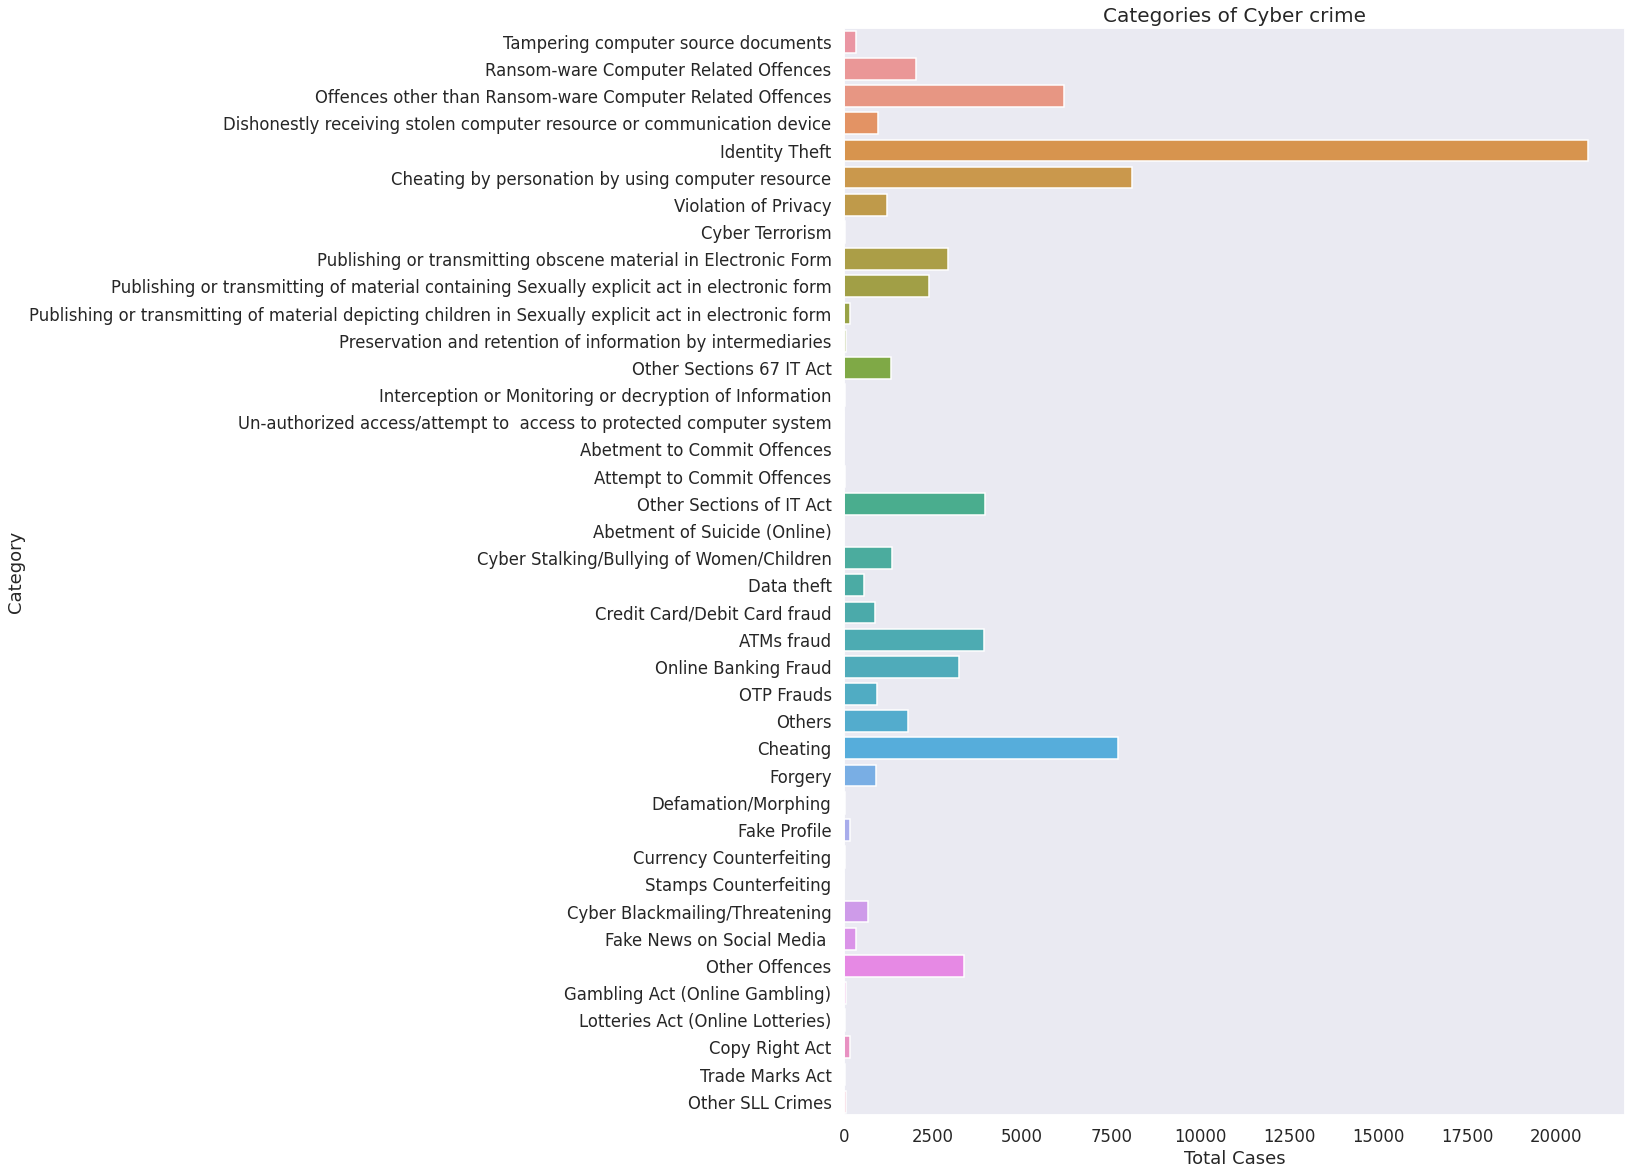

In [35]:
plt.figure(figsize = (14,20))
sns.barplot(y=cyber['Crime Head'],x=cyber['Total Cases for Investi-gation (Col.3+ Col.4+ Col.5)'])
plt.title("Categories of Cyber crime",size=20)
plt.xlabel("Total Cases",size=18)
plt.ylabel("Category",size=18)

Text(0.5, 1.0, 'Pending and new cases')

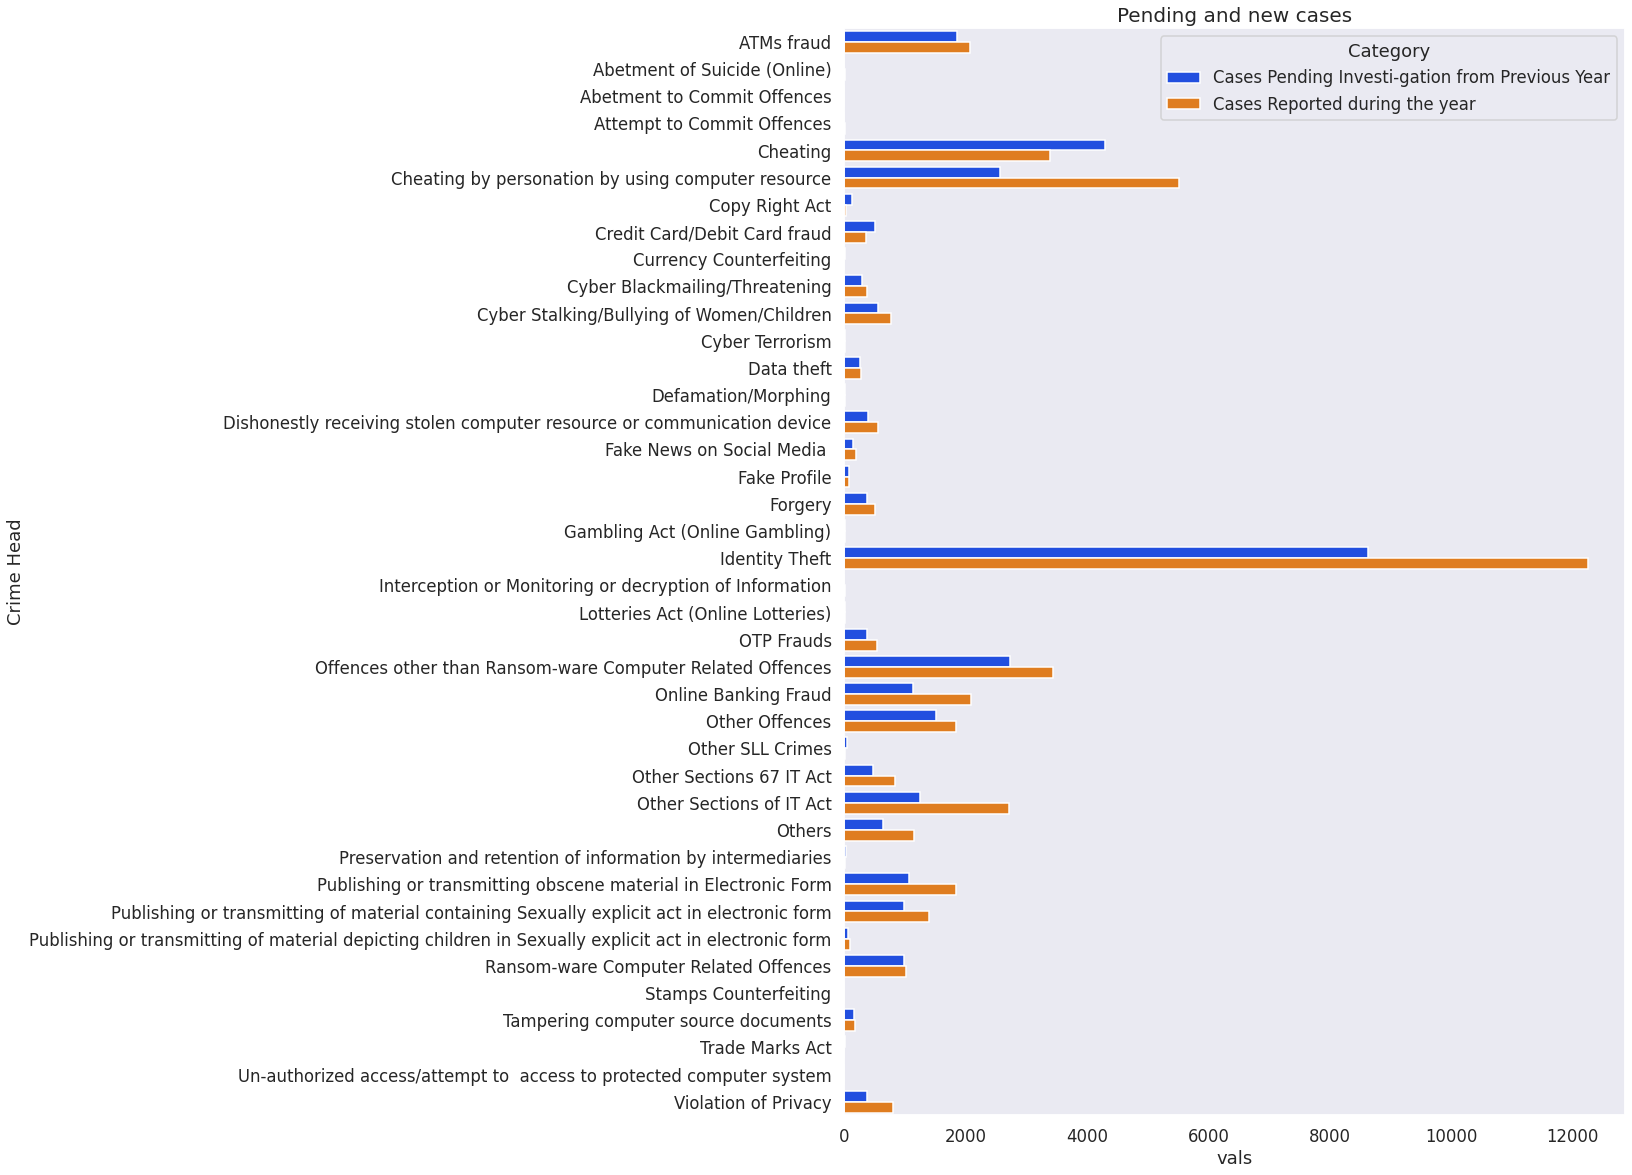

In [36]:
cyber1 = cyber.groupby(['Crime Head'])['Cases Pending Investi-gation from Previous Year','Cases Reported during the year'].sum().reset_index() 
cyber1 = cyber1.melt('Crime Head', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'Crime Head' , x = 'vals',hue = 'Category' ,data = cyber1,palette= 'bright')
plt.title("Pending and new cases",size=20)

# Analysis
## 1. The most common cyber crime is identity theft followed by cheating
## 2. In cheating category, pending cases from last year are higher than cases reported in 2019 which indicated that the procedure is really slow.
## 3. In almost all categories, cases pending from last year are half or evn more than cases reported in 2019.